In [1]:
import io
import json
import re
import requests
import time
from pdfminer.high_level import extract_text
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
with open('./TextoAspas.txt','r',encoding='utf-8') as abrir_txt:
   # with io.BytesIO(resposta.content) as abrir_txt:
        text = abrir_txt.read()


text


"\n    'autoriza','repasse','de','recursos','financeiros','decorrentes','de','transferências','da','união','e','do','estado',\n    'para','2','a','fundação','hospitalar','nossa','senhora','de','lourdes','senhor','presidente.','boa','noite,','colegas',\n    'vereadores,','público','que','nos','acompanha','fisicamente','nas','nossas','galerias','e','o','público','que','nos',\n    'assiste','pela','tv','banqueta.','eu','queria','rogar,','mais','uma','vez,','aos','meus','colegas','que','votassem',\n    'comigo','esse','pedido','de','dispensa','de','pareceres','e','interstícios','desse','projeto','de','lei','1.810.',\n    'isso','é','um','recurso','do','ministério','da','saúde','destinado,','encaminhado','fundo','a','fundo,','e','foi',\n    'encaminhado','ao','fundo','estadual','de','saúde,','uma','quantia','de','duzentos','mil','reais','para','custeio',\n    'temporário','de','assistência','de','média','e','alta','complexidade.','esse','recurso','foi','repassado','desde',\n    '2018,','ess

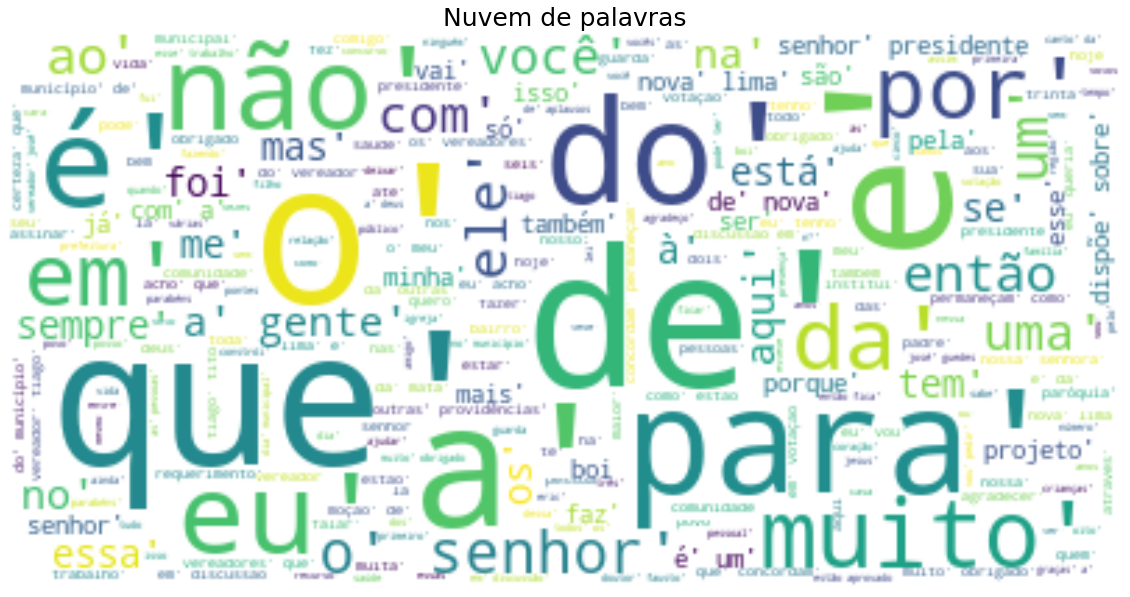

In [3]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [4]:
text = text.rstrip().replace('\n', '').lower()

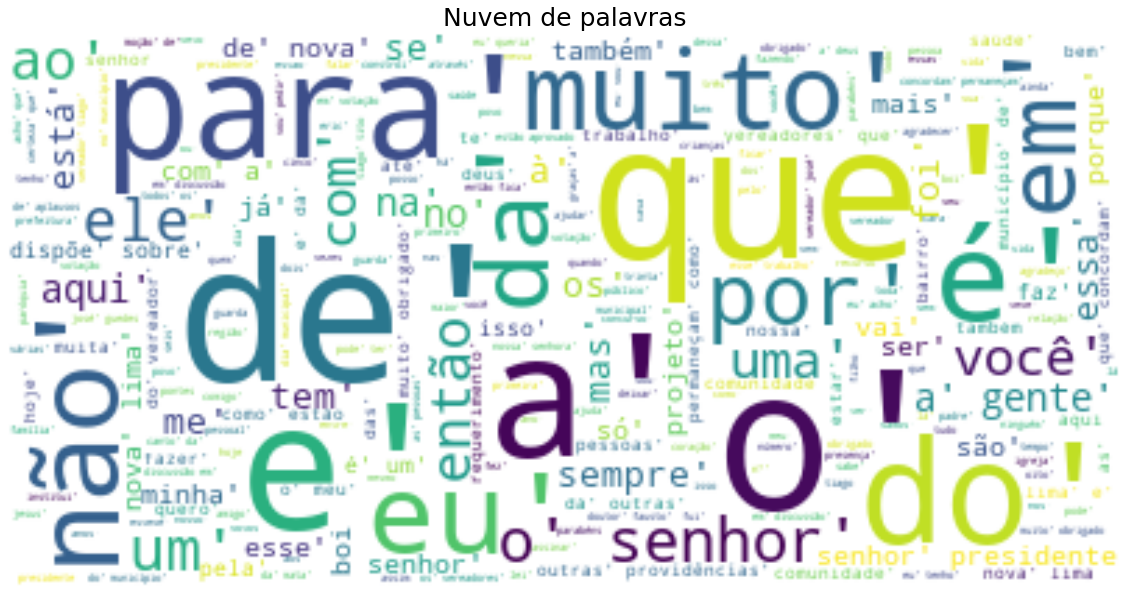

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [6]:
#word_tokenize(text)

In [7]:
tokenizer_projetos2020 = RegexpTokenizer('\d*.\d*d*/\d*')
numero_projetos2020 = tokenizer_projetos2020.tokenize(text)
numero_projetos2020

['2.590/2017', '1.810/2019', '1.766/2019']

In [8]:
tokenizer_projetos2019 = RegexpTokenizer('\d*d*/\d*')
numero_projetos2019 = tokenizer_projetos2020.tokenize(text)
numero_projetos2019

['2.590/2017', '1.810/2019', '1.766/2019']

In [9]:
tokens = word_tokenize(text)


pontuacao = [
             '(',
             ')',
             ';',
             ':',
             '[',
             ']',
             ',',
             '-',
             '?',
             'nº',
             's',
             '"',
             "'",
             '.',
             '”',
             '“',
             '”',
             '“',
             '-',
             '–',
           '...',
             '‘',
             '’',
             '/',
             '%',
    '.________________________________________________________',
    '._____________________________________',
    '.___________________________________________',
    '.__________________________________________',
    '._____________________',
    '.______________________________________________________________',
                ]

stop_words = set(stopwords.words('portuguese'))

stop_words_custom = ['0', '1', '10', '17', '18', '2', '2020', '3', '4', '5',
                     '50', '6', '7', '8', '9', 'abençoe', 'abençõe', 'aberta', 'abraço', 'abril',
                     'abrimos', 'acabou', 'acesso', 'achando-se', 'acho', 'acompanha', 'acrescentado',
                     'ad', 'administração', 'adotiva', 'afirmou', 'agora', 'agosto', 'agradecendo', 'agradecer', 
                     'agradeço', 'aguiar', 'ah', 'ainda', 'ajuda', 'ajudar', 'alessandro', 'alessandro luiz bonifácio', 
                     'algum', 'algumas', 'alguns', 'ali', 'almeida', 'alonso', 'altera', 'alterar', 'além', 'amigo',
                     'amigos', 'amor', 'ano', 'anos', 'antes', 'anunciou', 'aparte', 'aplausos', 'apoio', 'apostas', 
                     'aprendi', 'apresentação', 'após', 'aqui', 'art', 'artigo', 'assembleia', 'assessor', 'assessoria',
                     'assim', 'assinar', 'assinaturas', 'assiste','assistem', 'associação', 'assunto', 'ata', 'atendendo', 
                     'atender', 'atenção', 'através', 'atrás', 'audiência', 'autoria', 'azevedo', 'aí', 'bacana', 'baixo',
                     'banqueta', 'bem', 'bem-vindo', 'bicalho', 'bilhete', 'boa', 'boca', 'boi', 'bom', 'bonifácio', 'bota', 
                     'cada', 'cair', 'cala', 'calendário', 'cara', 'carinho', 'carlos', 'casa', 'caso', 'certeza', 'certo', 
                     'chamada', 'chegar', 'cheguei', 'cidade', 'cima', 'cinco', 'cinquenta', 'claro', 'coisa', 'coisas',
                     'colete', 'colete', 'colocar', 'coloco', 'colocou', 'colocou', 'colocou-a', 'colocou-as', 'comigo',
                     'comissão', 'comprimentar', 'comunicou', 'comunidade', 'concede', 'concordam', 'conferirem-na',
                     'conferirem-nas', 'conforme', 'conheço', 'constatando-se', 'constituída', 'continuar', 'convidou',
                     'convocação', 'coração', 'correspondência', 'correspondências', 'coxinha', 'cumprimentar', 'cumprimento',
                     'cumprimentos', 'cumprimentá-los', 'cutucando', 'câmara', 'd', 'dando', 'daquela', 'dar', 'data',
                     'ddeclaro', 'declaro', 'declarou', 'deixa', 'deixar', 'deliberação', 'demais', 'dentro', 'deputado',
                     'desde', 'desejo', 'desembro', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'deste', 'deu', 'deus',
                     'devido', 'dez', 'dezembro', 'dezenove', 'dezesseis', 'dezoito', 'dia', 'diante', 'dias', 'diferente',
                     'diga-se', 'diretora', 'diretrizes', 'discussão', 'discutindo', 'disponibilizar', 'dispõe', 'disse',
                     'disso', 'diz', 'dizendo', 'dizer', 'documentos', 'dois', 'doze', 'dr', 'duas', 'durante', 'dá', 'dúvida',
                     'ederson', 'ederson sebastião pinto', 'emenda', 'emenda', 'emendas', 'emissão', 'emitiu', 'empresa', 'encaminhada',
                     'encaminhadas', 'encaminhado', 'encaminho', 'encerrada', 'encerrar', 'encontrava-se', 'enquanto', 'entendeu',
                     'entendi', 'entregue', 'então', 'errado', 'especial', 'especifica', 'esperar', 'espero', 'esposa', 'estabelece',
                     'estado', 'estadual', 'estar', 'estaremos', 'estará', 'ex-prefeito', 'ex-presidente', 'exatamente', 'excelência',
                     'exceção', 'executar', 'executivo', 'exemplo', 'existe', 'explicar', 'extatamente', 'extraordinária', 'fala',
                     'falando', 'falar', 'falei', 'falo', 'falou', 'falta', 'faria', 'fato', 'fausto', 'fausto niquini ferreira',
                     'favor', 'favoráveis', 'favorável', 'faz', 'fazendo', 'fazer', 'faça', 'façamos', 'faço', 'feira', 'feita',
                     'feitas', 'feito', 'feliz', 'ferreira', 'fevereiro', 'fez', 'fica', 'ficar', 'fico', 'fiz', 'fizemos', 'fizeram',
                     'flavio', 'flávio', 'flávio de almeida', 'fmfpm', 'forma', 'força', 'frente', 'frente', 'fé', 'gabinetes', 'gas',
                     'gente', 'geraldo', 'gostaria', 'gosto', 'governo', 'grade', 'grande', 'graça', 'graças', 'guedes', 'gás', 'hino', 
                     'história', 'hoc', 'hoje', 'hora', 'horas', 'horário', 'igual', 'ii', 'impacto', 'importante', 'impressionante',
                     'incentivo', 'inclusive', 'indo', 'infelizmente', 'iniciar', 'inserido', 'institui', 'integral', 'inteiro', 'interessante', 
                     'interno', 'interresante', 'intuito', 'início', 'ir', 'jamais', 'janeiro', 'jeito', 'jesus', 'josé', 'josé carlos de oliveira',
                     'joão', 'julho', 'junho', 'junto', 'juntos', 'justiça', 'kim', 'kim do gas', 'kim do gás', 'lado', 'legal', 'legislativa',
                     'legislativo', 'legislação', 'lei', 'leitura', 'ler', 'levar', 'li', 'lima', 'limense', 'lislie', 'livro', 'logo', 'lugar',
                     'luiz', 'luta', 'lá', 'maio', 'maior', 'mandar', 'mandato', 'manhã', 'manifestou', 'março', 'meio', 'melhor', 'menos', 'merece',
                     'mesa', 'mesma', 'mesquita', 'mil', 'mim', 'minuto', 'minutos', 'momento', 'morais', 'moção', 'muita', 'muitas', 'municipais',
                     'municipal', 'município', 'mês', 'nacional', 'nada', 'naquele', 'naturalmente', 'nenhum', 'nenhuma', 'nessa', 'nesse', 'nesse',
                     'nesses', 'nesta', 'neste', 'ninguém', 'niquini', 'noite', 'nome', 'nova', 'nova', 'nova-limense', 'nova-limenses', 'novamente',
                     'nove', 'novembro', 'noventa', 'nunca', 'número', 'obrigado', 'obrigação', 'observação', 'oi', 'oitenta', 'oito', 'ok', 'olha',
                     'oliveira', 'onde', 'ontem', 'opinião', 'oportunidade', 'ordem', 'ordinária', 'orgulho', 'outra', 'outras', 'outro', 'outros',
                     'outubro', 'ouvir', 'pai', 'palavra', 'palavras', 'parabenizar', 'parabéns', 'paragáfo', 'parece', 'parecer', 'pares', 
                     'parlamentar', 'parte', 'participei', 'participou', 'partido', 'passa', 'passado', 'passando', 'passar', 'pasta', 'pauta',
                     'pedido', 'pedindo', 'pedir', 'percentual', 'perda', 'perez', 'permaneçam', 'permite', 'pessoa', 'pessoal', 'pessoas', 'peço',
                     'pinto', 'plenária', 'plenário', 'pode', 'podem', 'poder', 'poderia', 'política', 'população', 'porque', 'porta', 'porta',
                     'portaria', 'portas', 'possa', 'posse', 'posso', 'possível', 'pouco', 'povo', 'prazo', 'precisa', 'prefeito', 'prefeitura',
                     'presente', 'presentes', 'presença', 'presidente', 'presidindo', 'primeira', 'primeiro', 'principalmente', 'prioridade',
                     'problema', 'problemas', 'processo', 'proferiu', 'projeto', 'projetos', 'promessas', 'promulgação', 'pronunciamento',
                     'proteção', 'providências', 'proximo', 'próprio', 'próxima', 'próximo', 'puder', 'pudesse', 'pé', 'pública', 'público',
                     'públicos', 'qualquer', 'quanto', 'quarta-feira', 'quatro', 'quebra', 'quer', 'queria', 'querido', 'quero', 'questão',
                     'quinze', 'quiser', 'quê', 'realização', 'realmente', 'recebidas', 'recomendação', 'redação', 'referente', 'regimento',
                     'registrado', 'registrar', 'regularizar', 'regularização', 'relação', 'remota', 'repetir', 'representando', 'representação',
                     'requer', 'requerimento', 'requerimentos', 'resolução', 'resolver', 'respeito', 'ressaltar', 'reuniu-se', 'reunião',
                     'reuniões', 'rogo', 'rosana', 'rua', 'sabe', 'sabemos', 'saber', 'sair', 'sala', 'sanção', 'se', 'se', 'sebastião',
                     'secretário', 'sede', 'seguida', 'seguinte', 'segunda', 'segundo', 'sei', 'seis', 'semana', 'sempre', 'sendo', 'senhor',
                     'senhora', 'senhores', 'sentido', 'senão', 'ser', 'serginho', 'servidor', 'serviço', 'serviços', 'servodores', 'sessenta',
                     'sete', 'setembro', 'silva', 'silva', 'silvânio', 'silvânio aguiar silva', 'silêncio', 'sim', 'simplesmente', 'situação',
                     'sob', 'sobre', 'solicita', 'solicitação', 'solicito', 'solicitou', 'somente', 'soneca', 'substituição', 'sucesso', 'sério',
                     'talvez', 'tanto', 'tarde', 'tempo', 'tendo', 'ter', 'terça', 'terça-feira', 'tiago', 'tiago tito', 'tito', 'toda', 'todas',
                     'todo', 'todos', 'tomada', 'total', 'trabalhar', 'trabalhos', 'trago', 'tramitação', 'tranquilo', 'trata', 'tratando-se',
                     'tratar', 'trinta', 'três', 'tudo', 'tv', 'tá', 'tão', 'têm', 'ultimo', 'um', 'unica', 'unica', 'uns', 'uso', 'vai',
                     'vamos', 'varias', 'vem', 'vendo', 'ver', 'verbal', 'verdade', 'vereador', 'vereadores', 'verificando-se', 'vez', 'vezes',
                     'vice-prefeito', 'vice-presidente', 'vida', 'vinte', 'vir', 'virtual', 'virtualmente', 'vista', 'viu', 'vizinho',
                     'voltar', 'voltar', 'volto', 'vossa', 'vota', 'votaram', 'votação', 'votações', 'votos', 'vou', 'várias', 'vários',
                     'váriros', 'vão', 'vê', 'wendel', 'wesley', 'wesley de jesus silva', 'àqueles', 'álvaro', 'álvaro',
                     'álvaro alonso perez morais de azevedo', 'âmbito', 'época', 'última', 'último', 'única'
                    ]




In [10]:
#organziar = []
#organizar = stop_words_custom
#organizar.sort()
#print(organizar,  sep=' ', end='\n',  flush=False)

In [11]:
len(tokens)

17709

In [12]:
resultado1 = [resultado for resultado in tokens if resultado not in stop_words]

In [13]:
print(len(resultado1))

17089


In [14]:
resultado2 = [resultado1 for resultado1 in resultado1 if resultado1 not in pontuacao]

In [15]:
print(len(resultado2))

4847


In [16]:
resultado3 = [resultado2 for resultado2 in resultado2 if resultado2 not in numero_projetos2020]

In [17]:
print(len(resultado3))

4845


In [18]:
resultado4 = [resultado3 for resultado3 in resultado3 if resultado3 not in numero_projetos2019]

In [19]:
print(len(resultado4))

4845


In [20]:
resultado5 = [resultado4 for resultado4 in resultado4 if resultado4 not in stop_words_custom]

In [21]:
print(len(resultado5))

4831


In [22]:
#portuguese_stemmer = SnowballStemmer('portuguese')

In [23]:
#resultado5 = []
#for i in resultado4:
    #print(portuguese_stemmer.stem(i))
    #resultado5.append(portuguese_stemmer.stem(i))
    
#resultado5 = word_tokenize(str(resultado5))
#len(resultado5)

In [24]:
#resultado5 = [resultado5 for resultado5 in resultado5 if resultado5 not in pontuacao]

In [25]:
#len(resultado5)

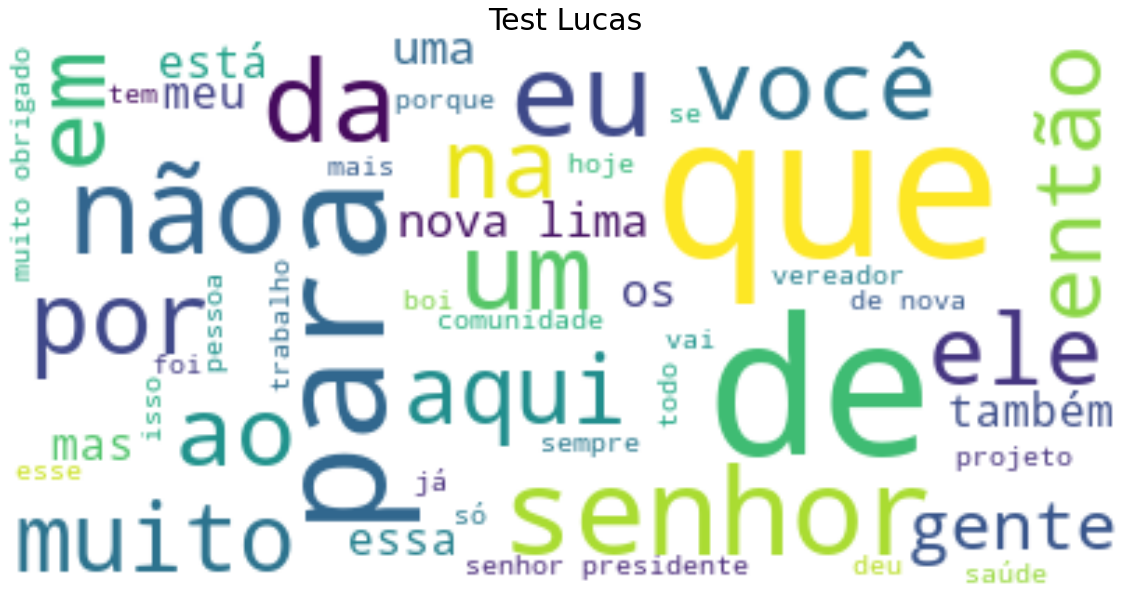

["'autoriza", "'repasse", "'de", "'recursos", "'financeiros", "'decorrentes", "'de", "'transferências", "'da", "'união", "'do", "'estado", "'para", "'fundação", "'hospitalar", "'nossa", "'senhora", "'de", "'lourdes", "'senhor", "'presidente", "'boa", "'noite", "'colegas", "'vereadores", "'público", "'que", "'nos", "'acompanha", "'fisicamente", "'nas", "'nossas", "'galerias", "'público", "'que", "'nos", "'assiste", "'pela", "'tv", "'banqueta", "'eu", "'queria", "'rogar", "'mais", "'uma", "'vez", "'aos", "'meus", "'colegas", "'que", "'votassem", "'comigo", "'esse", "'pedido", "'de", "'dispensa", "'de", "'pareceres", "'interstícios", "'desse", "'projeto", "'de", "'lei", '1.810', "'isso", "'um", "'recurso", "'do", "'ministério", "'da", "'saúde", "'destinado", "'encaminhado", "'fundo", "'fundo", "'foi", "'encaminhado", "'ao", "'fundo", "'estadual", "'de", "'saúde", "'uma", "'quantia", "'de", "'duzentos", "'mil", "'reais", "'para", "'custeio", "'temporário", "'de", "'assistência", "'de", "'m

In [26]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 50, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 30)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    print(data)

show_wordcloud(resultado5,  'Test Lucas')

In [27]:
fd = FreqDist(resultado5)
fd


FreqDist({"'de": 190, "'que": 181, "'do": 92, "'para": 80, "'eu": 75, "'senhor": 69, "'em": 63, "'muito": 61, "'não": 53, "'da": 50, ...})

In [28]:

#fd = FreqDist(resultado3).plot()
#fd


In [29]:
fd = FreqDist(resultado5)
teste = []
for i in fd.items():
     teste.append(i)

teste.sort()

In [30]:
teste

[("''", 5),
 ("'01", 1),
 ("'02", 1),
 ("'10", 2),
 ("'11", 1),
 ("'15", 1),
 ("'16", 1),
 ("'17", 1),
 ("'18", 1),
 ("'19", 1),
 ("'20", 1),
 ("'2003", 1),
 ("'2018", 1),
 ("'21", 1),
 ("'22", 1),
 ("'23", 1),
 ("'24", 1),
 ("'25", 1),
 ("'26", 1),
 ("'27", 1),
 ("'28", 1),
 ("'abandono", 1),
 ("'abençoar", 1),
 ("'abençoe", 1),
 ("'abertas", 2),
 ("'abraçar", 2),
 ("'abraço", 1),
 ("'abraçou.", 1),
 ("'abre", 1),
 ("'acaba", 1),
 ("'acesso", 4),
 ("'acha", 1),
 ("'acho", 8),
 ("'aclamação", 1),
 ("'acolher", 1),
 ("'acompanha", 3),
 ("'acompanhadas", 1),
 ("'acompanham", 1),
 ("'acompanhamento", 1),
 ("'acompanhava", 1),
 ("'acontecer", 1),
 ("'acontecido", 1),
 ("'acusação", 1),
 ("'acúmulo", 1),
 ("'admira", 1),
 ("'adolescentes", 1),
 ("'adquiriu", 1),
 ("'adversidade", 1),
 ("'afirmaram", 1),
 ("'afixação", 1),
 ("'agora", 2),
 ("'agradecemos", 1),
 ("'agradecendo", 1),
 ("'agradecer", 6),
 ("'agradeço", 5),
 ("'agrega", 1),
 ("'agregar", 1),
 ("'aguiar", 4),
 ("'ainda", 5),
 ("'